Patient ID (2 4 19):  11


Patient Id:  11  Image ID:  0c803c4810a8c5ec362f5d4504489431  Image Path:  /home/ubuntu/vinbigdata/DemoConversionToJPG/


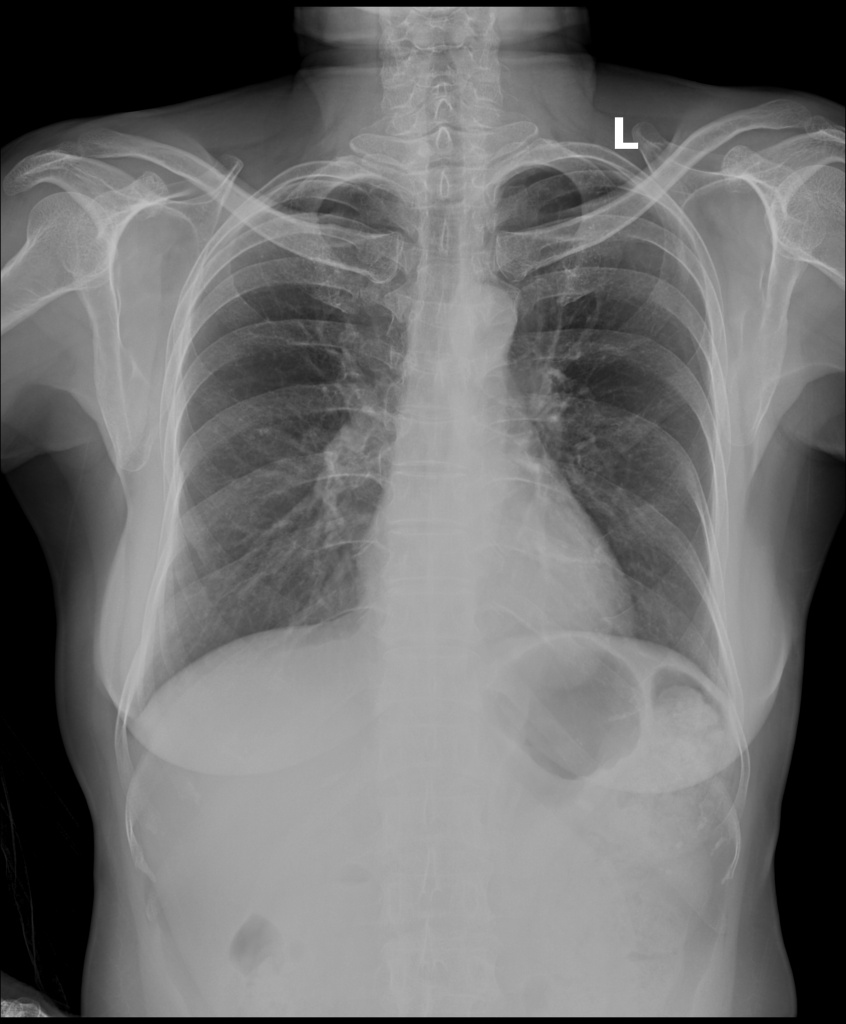

CPU times: user 21.3 ms, sys: 0 ns, total: 21.3 ms
Wall time: 2.46 s


In [14]:
%%time

import pymysql
from IPython.display import display, Image
#import sys

#import cv2
#import numpy as np

# try:
PatientId = input("Patient ID (2 4 19): ")

#PatientID Count of images
#1	2
#4	2
#5	1
#7	3
#9	1
#11	2
#12	1
#13	1
#14	2

s2conn = pymysql.connect(
    user='root',
    password='Sglstrpw34',
    host='172.31.62.112',
    port=3306,
    database='Images')

mycursor = s2conn.cursor()


sql_insert_blob_query =  """SELECT ih.PatientID, ih.file, i.ImagePath, i.Image from PatientRecords.ImageHeader ih left join Images.JPGImages i on ih.file = i.file where ih.PatientID = %s"""

mycursor.execute(sql_insert_blob_query, PatientId)

record = mycursor.fetchall()
for row in record:
    print("Patient Id: ", row[0], " Image ID: ", row[1], " Image Path: ", row[2])
    image = row[3]
    #cv2.rectangle(image, (0, 0), (100, 100), (255,0,0), 2)
    display(Image(image))    

#except pymysql.connect.Error as error:
    #print("Failed select BLOB data into S2 table {}".format(error))

#finally:
    #if s2conn.is_connected():
mycursor.close()
s2conn.close()